In [1]:
import sys
sys.path.append('../../')

from skimage import io
import matplotlib.pyplot as plt

import array_wise_eval as awe

Load the RGB, ground truth label, and predicted confidence map of the example tile "180695_ne"

In [2]:
rgb = io.imread('../dilation_based_grouping/180695_ne.jpg')
lbl = io.imread('../dilation_based_grouping/180695_ne.png')
conf = io.imread('180695_ne_conf.png')

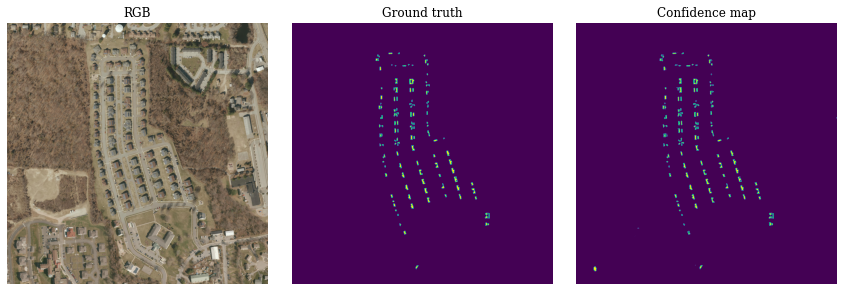

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

for i, (img, name) in enumerate(zip([rgb, lbl, conf], ['RGB', 'Ground truth', 'Confidence map'])):
    ax[i].imshow(img)
    ax[i].set_title(name)
    ax[i].axis('off')
    
plt.tight_layout()
plt.show()

Prepare parameters to `awe.plot_object_curve` call.

When evaluating one or multiple tiles, you'll need:
1. A list of tile names are required, as well
2. 2 python `dict` storing tile names as keys and confidence maps/ground truth labels as values respectively (`conf_dict` for confidence maps and `gt_dict` for ground truth labels).
3. A python `dict` for post-processing parameters. 

In [4]:
tile_name_list = ['180695_ne']
conf_dict = {'180695_ne': conf}
gt_dict = {'180695_ne': lbl}

params_dict = {
    'min_size': awe.MIN_SIZE, # Minimum panel polygon size threshold
    'min_th': awe.MIN_TH, # Minimum confidence threshold (0-255 range)
    'iou_th': awe.IOU_TH, # IoU threshold for array-wise matching (0-1 range)
    'dilation_size': awe.DILATION_SIZE # Dilation size (pixels) for arrayt-wise grouping
}

`awe.plot_object_curve` supports calculating two types of curves:
1. Array-wise precision-recall curve: X-axis: recall. Y-axis: precision.
2. Array-wise ROC curve: X-axis: number offalse positives per unit area. Y-axis: true positive rate.

Use the `curve_type` keyword to select which curve to calculate ('pr' or 'roc'). Default: 'roc'

Tiles: 100%|██████████| 1/1 [00:13<00:00, 13.98s/it]


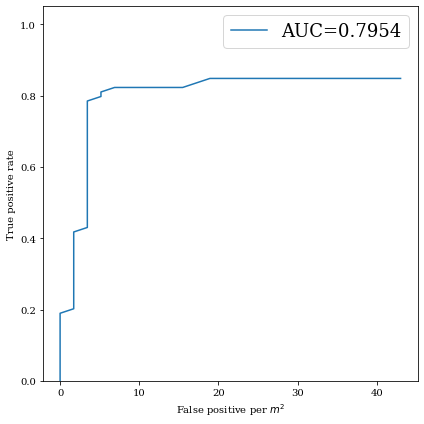

In [7]:
plt.figure(figsize=(6, 6))
awe.plot_object_curve(tile_name_list, conf_dict, gt_dict, params_dict, curve_type='roc')
plt.ylim([0, 1.05])
plt.xlabel('False positive per $m^2$')
plt.ylabel('True positive rate')
plt.legend(fontsize=18)
plt.tight_layout()
plt.show()

Tiles: 100%|██████████| 1/1 [00:13<00:00, 13.85s/it]


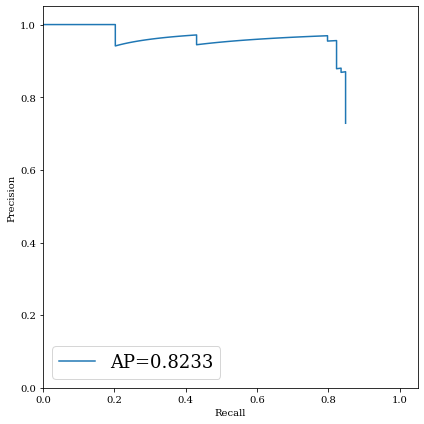

In [8]:
plt.figure(figsize=(6, 6))
awe.plot_object_curve(tile_name_list, conf_dict, gt_dict, params_dict, curve_type='pr')
plt.xlim([0, 1.05])
plt.ylim([0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(fontsize=18)
plt.tight_layout()
plt.show()